In [ ]:
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys
import scFates as scf
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

sc.settings.set_figure_params(dpi=80)
%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=8 )

In [ ]:
sc.set_figure_params(figsize=(6,6),frameon=False)

In [ ]:
import scvelo as scv

In [ ]:
adata = sc.read_h5ad('trigem_umap_rty.h5ad')

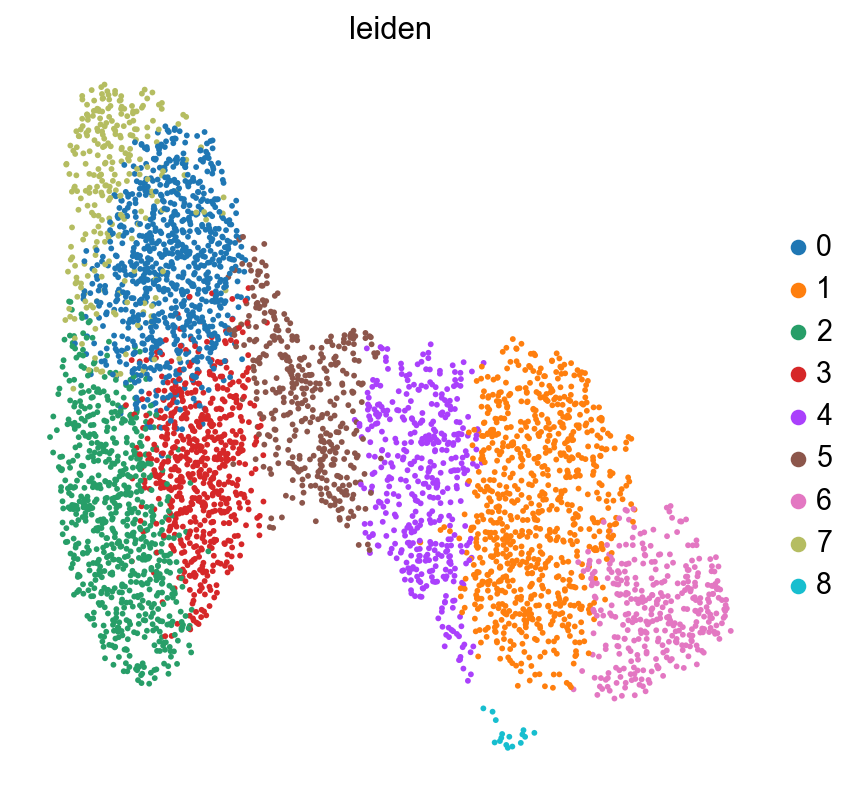

In [ ]:
sc.pl.umap(adata, color=["leiden",], layer="counts")

In [ ]:
adata

AnnData object with n_obs × n_vars = 4381 × 1729
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
scf.tl.curve(adata,Nodes=40, use_rep="X_umap", epg_lambda=0.1, epg_mu=120)

inferring a principal curve --> parameters used 
    40 principal points, mu = 120, lambda = 0.1
    finished (0:00:09) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] hard assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


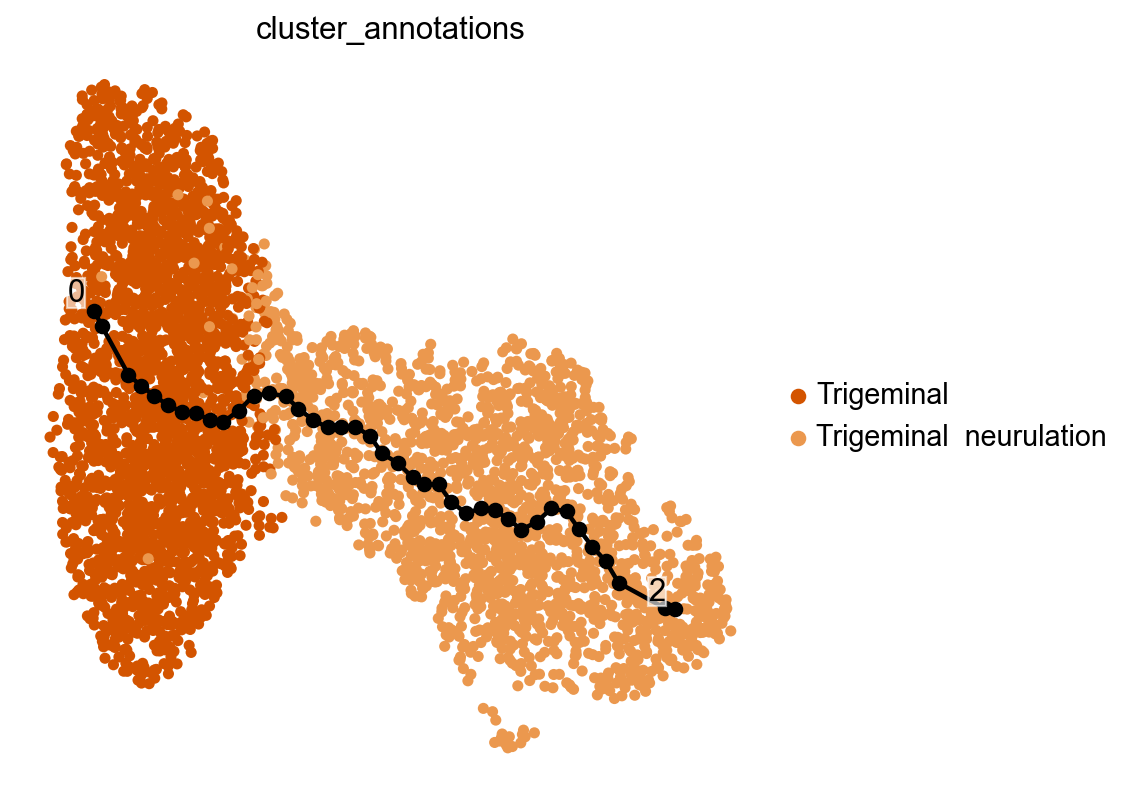

In [ ]:
scf.pl.graph(adata,basis="umap", color_cells='cluster_annotations', size=100)

In [ ]:
scf.tl.root(adata,0)

node 0 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [ ]:
scf.tl.pseudotime(adata,n_jobs=20)

projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


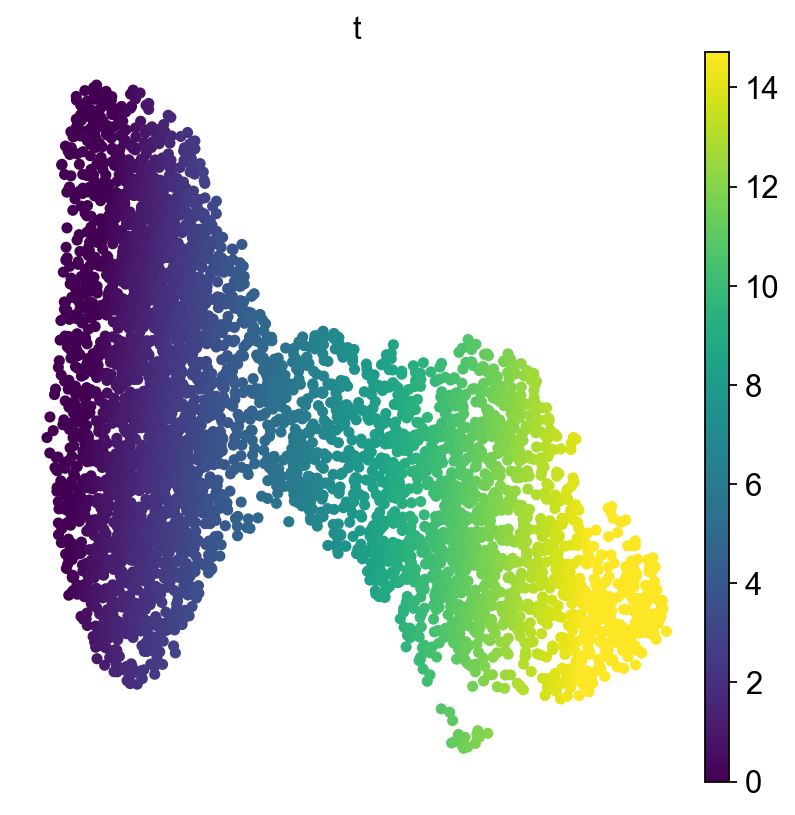

In [ ]:
sc.pl.umap(adata,color="t",size=100)

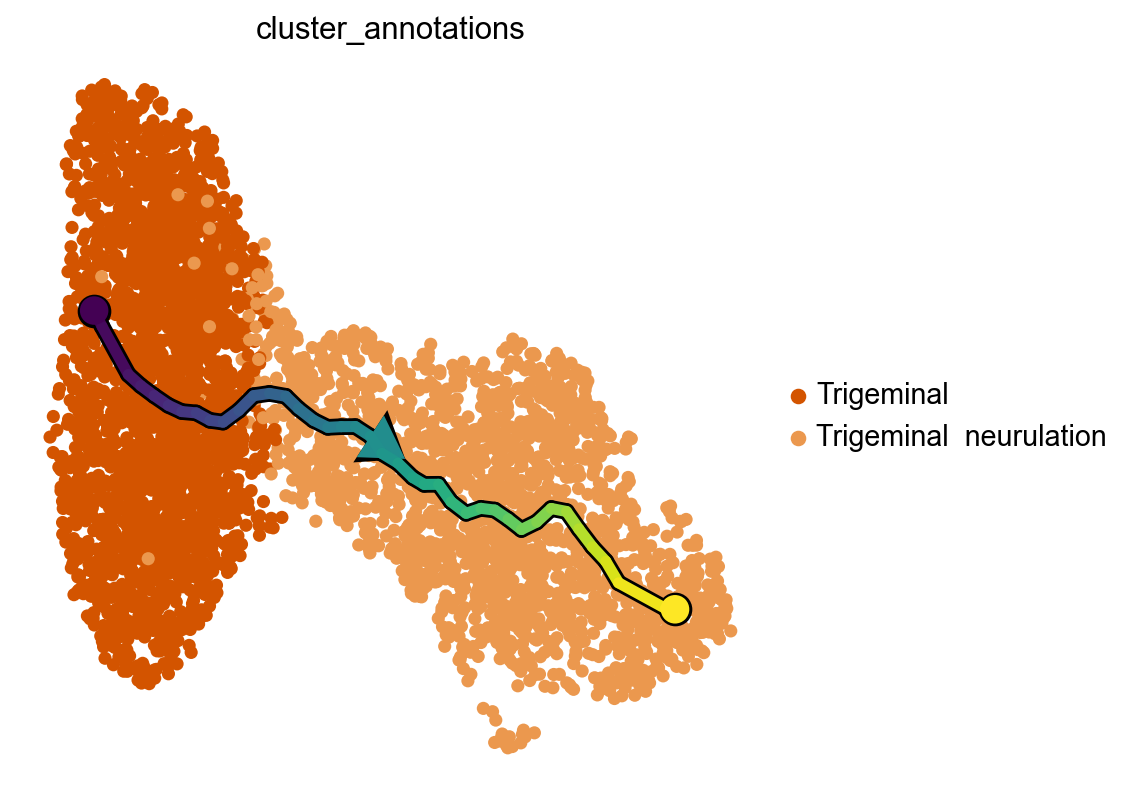

In [ ]:
scf.pl.trajectory(adata,basis="umap",arrows=True,arrow_offset=1,  color_cells='cluster_annotations', size=140,
                  #save='Trim_umap_tragectory.svg'
                 )

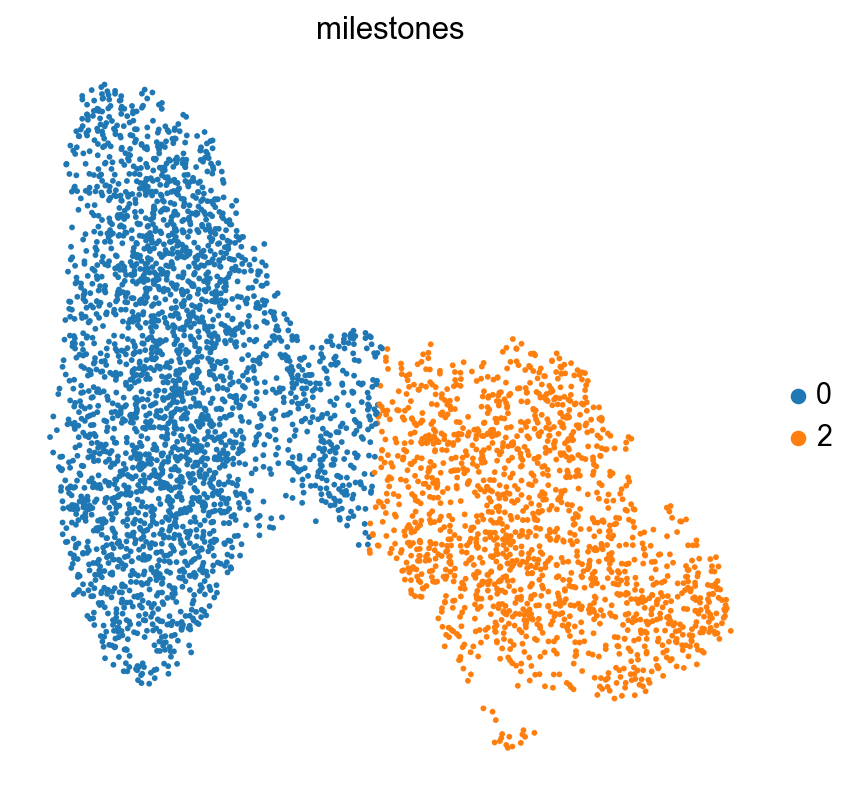

In [ ]:
sc.pl.umap(adata,color="milestones")

In [ ]:
scf.tl.linearity_deviation(adata, start_milestone='0',end_milestone='2', basis="umap")

Estimation of deviation from linearity
    cells on the bridge: 100%|██████████| 2629/2629 [00:19<00:00, 133.96it/s]
    finished (0:00:20) --> added 
    .var['0->2_rss'], pearson residuals of the linear fit.
    .obs['0->2_lindev_sel'], cell selections used for the test.


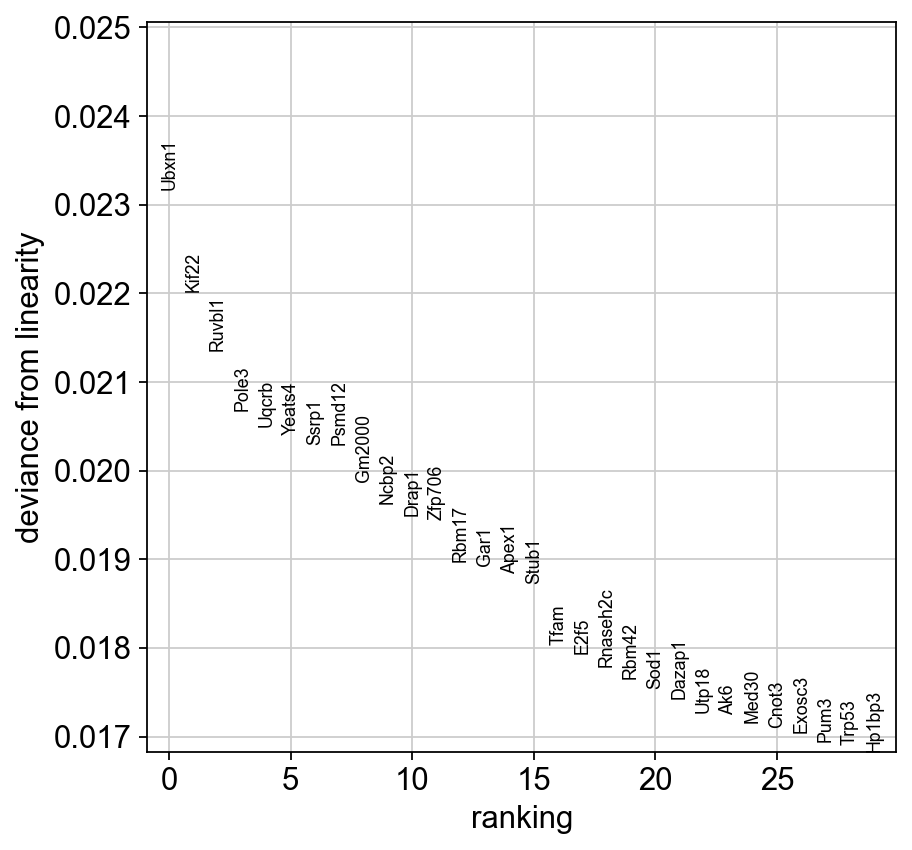

In [ ]:
scf.pl.linearity_deviation( adata,start_milestone="0", end_milestone="2")

In [ ]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):

    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np

    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)

    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))

    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")


test features for association with the trajectory
    single mapping : 100%|██████████| 1729/1729 [14:51<00:00,  1.94it/s]
    found 391 significant features (0:14:51) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


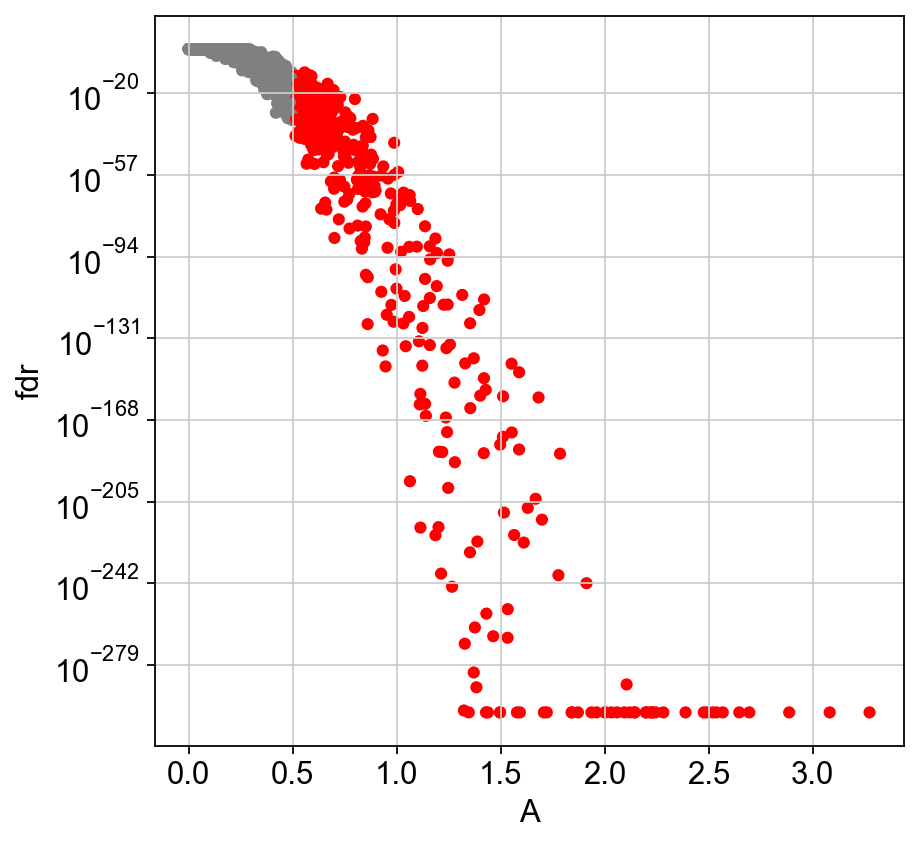

In [ ]:
scf.tl.test_association(adata,reapply_filters=True,A_cut=.5)
scf.pl.test_association(adata)

In [ ]:
scf.tl.fit(adata,n_jobs=20)

fit features associated with the trajectory
    single mapping : 100%|██████████| 391/391 [00:33<00:00, 11.82it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:33) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [ ]:
adata1=adata.copy()

In [ ]:
scf.tl.cluster(adata1,n_neighbors=60,metric="correlation", resolution=0.4)

Clustering features using fitted layer
computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
    finished (0:00:09) --> added 
    .var['cluters'] identified modules.


In [ ]:
adata1.var.cluters.unique()

['0', '1']
Categories (2, object): ['0', '1']

Index(['Foxp1', 'Scmh1', 'Nuak1', 'Hhat', 'Arg1', 'Zbtb16', 'Nr2f2', 'Peg3',
       'Foxp2', 'Tcf12',
       ...
       'Ckmt1', 'Esrra', 'Pou4f1', 'Lhx2', 'Npdc1', 'Xbp1', 'Pou2f2', 'Nr6a1',
       'Zfp532', 'Dach1'],
      dtype='object', length=223)

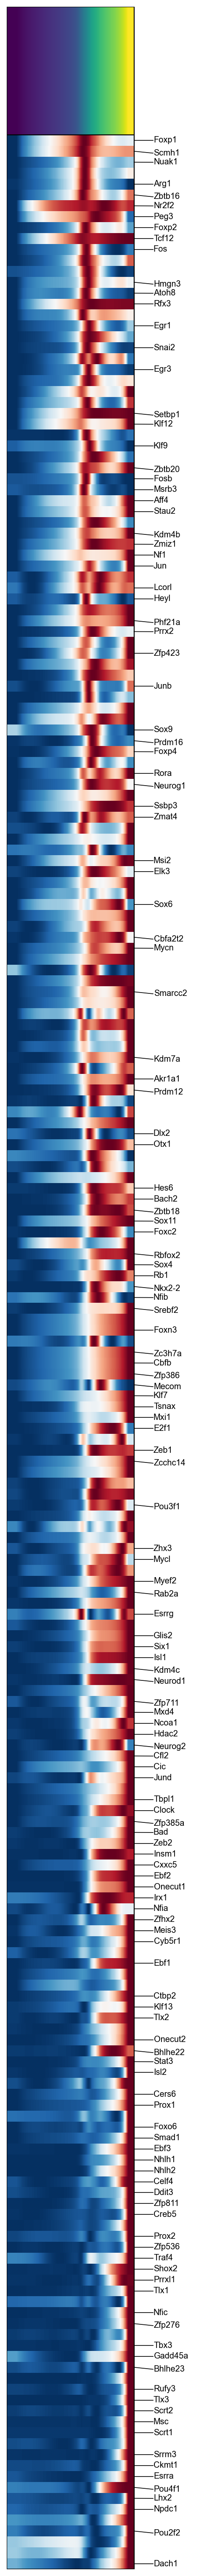

In [ ]:
g1=scf.pl.trends(adata1,features=adata1.var_names[adata1.var.cluters=='0'],basis="umap", n_features=150,return_genes=True,
              plot_emb=False,
              figsize=(4,50)
                )
g1

In [ ]:
gg1=["Pax8","Sp5","Sp8","Sox3","Maf","Tcf15","Msx1","Frem1","Pkm","Tpi1","Klf5","Zfp503","Rpl35","Rps4x","Ahr","Msx2","Ybx1","Rpl6","Tcf7","Dlx5",
     "Lef1","Rps10","Eno1","Tagln2","Tfap2c","Lmx1b","Ran","Prdm1","H2afz","Hspa5","Mbnl2","Lin28a","Arid3b","Nap1l1","Dlx6","Tgif1","Rbms1","Hnrnpc",
     "U2af1","Id1","Hmgb1","Canx","Magoh","Rarg","Hnrnpa0","Hmga2","Dab2","Ezr","Eef1d","Trp63","Vamp3","Gtf3a","Ruvbl1","Pax3","Rest","Ikzf2",
     "Hmgb3","Gar1","Foxb1","Gli2","Glis3","Meis2","Trerf1","Meis1","Nfat5","Pitx1","Pax6","Pbx3","Foxc1","Nr2f1","Snd1","Zfp462","Tfap2a","Otx2",
     "Cdk2ap1","H1fx","Trp53","Tgif2","Gli2","Foxp1","Scmh1","Nuak1","Arg1","Zbtb16","Nr2f2","Peg3","Foxp2","Tcf12","Fos","Hmgn3","Atoh8","Rfx3",
     "Egr1","Snai2","Egr3","Setbp1","Klf12","Klf9","Zhx3","Mycl","Myef2","Rab2a","Esrrg","Glis2","Six1","Isl1","Kdm4c","Neurod1","Zfp711","Mxd4","Ncoa1",
     "Hdac2","Neurog2","Cfl2","Cic","Jund","Tbpl1","Clock","Zfp385a","Bad","Zeb2","Insm1","Cxxc5","Ebf2","Onecut1","Irx1","Nfia","Nfix","Zfhx2","Meis3",
     "Cyb5r1","Ebf1","Ctbp2","Klf13","Tlx2","Onecut2","Bhlhe22","Stat3","Isl2","Cers6","Prox1","Foxo6","Smad1","Ebf3","Nhlh1","Nhlh2","Celf4","Ddit3",
     "Zfp811","Creb5","Prox2","Zfp536","Traf4","Shox2","Prrx1","Tlx1","Nfic","Zfp276","Tbx3","Gadd45a","Bhlhe23","Rufy3","Tlx3","Scrt2","Msc","Scrt1",
     "Srrm3","Ckmt1","Esrra","Pou4f1","Lhx2","Npdc1","Pou2f2","Dach1"]

Original list: 174 genes
Filtered list: 172 genes (kept only valid ones)
Missing genes: ['Tcf15', 'Nfix']


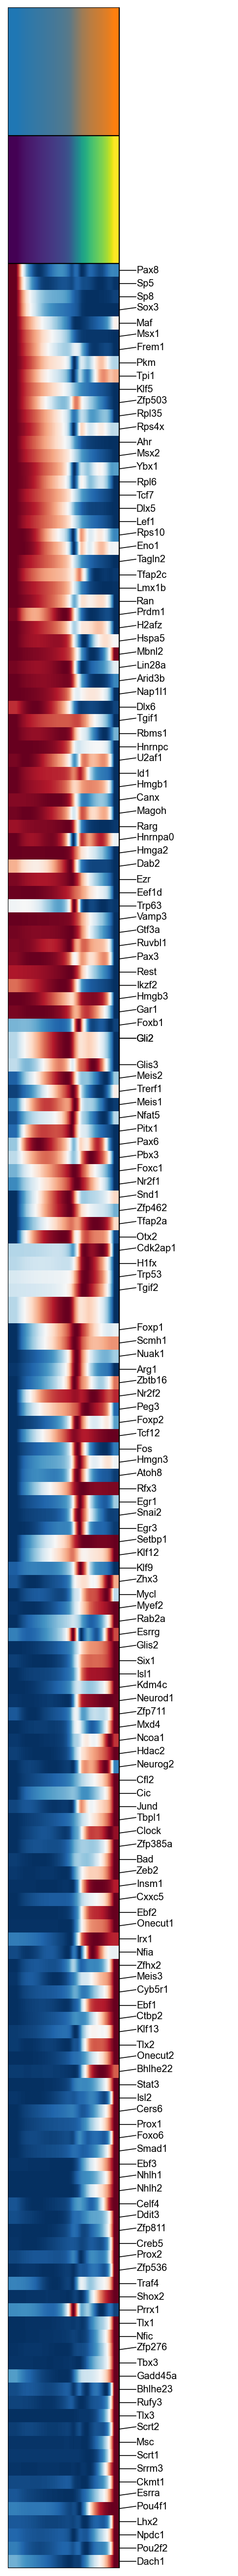

In [ ]:
# Filter gg1 so only genes present in adata1.var_names are kept
gg1_filtered = [g for g in gg1 if g in adata1.var_names]

print(f"Original list: {len(gg1)} genes")
print(f"Filtered list: {len(gg1_filtered)} genes (kept only valid ones)")
print("Missing genes:", [g for g in gg1 if g not in adata1.var_names])

# Dynamically adjust figure height based on number of genes
fig_height = len(gg1_filtered) * 0.25   # ~0.25 inch per gene (tweak if needed)

# Plot
genes_used = scf.pl.trends(
    adata1,
    features=gg1_filtered,
    basis="umap",
    annot="milestones",
    plot_emb=False,
    heatmap_space=0.0,         # remove extra padding
    figsize=(4, fig_height),   # auto-fit to gene count
    ordering=None,
    return_genes=True,
    n_features=len(gg1_filtered)
)
plt.savefig("figures/Trigem_heat.svg")

In [ ]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):

    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np

    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)

    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))

    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")

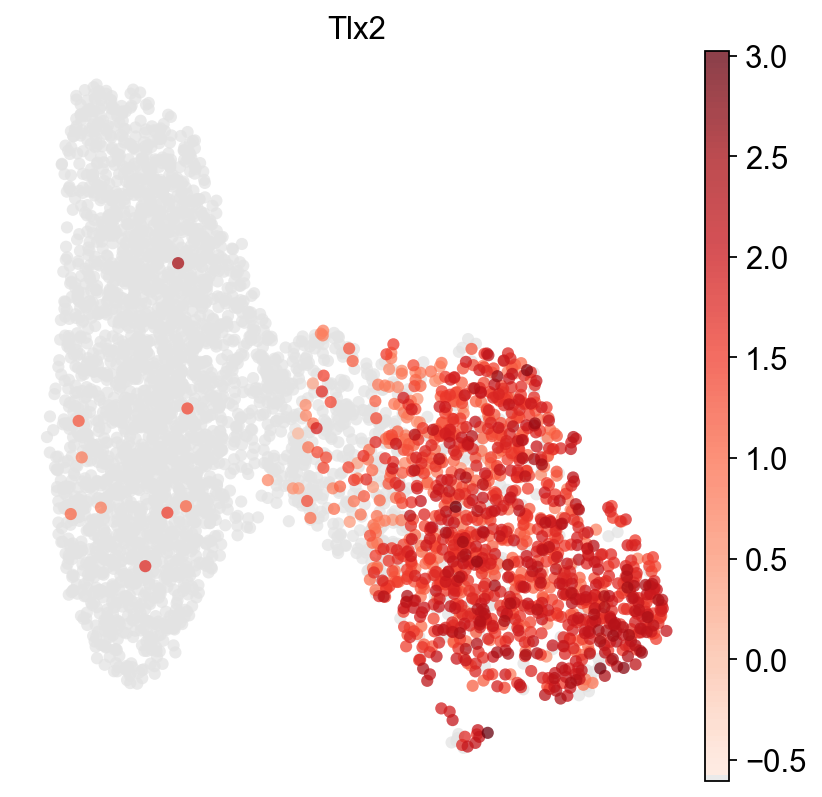

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

In [ ]:
# to plot on umap
sc.pl.umap(adata, color = ["Tlx2"], color_map = reds_cmap, frameon = False, size = 120, alpha = .75, legend_loc='on data',
        #save='Tlx2.svg'
          )


In [ ]:
# List of regulons

In [ ]:
Regulons=["Zscan10(+)", "Srf(+)", "Six2(+)", "Zfp523(+)", "Pitx2(+)", "Myc(+)", "Stat6(+)", "Zbtb49(+)", "Snapc4(+)", "Rxrg(+)",
"Nfe2l2(+)", "E2f4(+)", "Foxd3(+)", "Dlx1(+)", "Nfyb(+)", "Hmga2(+)", "Zfp777(+)", "Mybl2(+)", "Gata2(+)", "Pitx1(+)",
"Kmt2b(+)", "Zbtb7b(+)", "Alx3(+)", "Gtf3c2(+)", "Ppara(+)", "Klf4(+)", "Irf2(+)", "Dlx6(+)", "Gata6(+)", "Rarg(+)",
"Setdb1(+)", "Ovol2(+)", "Rfx4(+)", "Mecp2(+)", "Zfp354c(+)", "Trp63(+)", "Dmbx1(+)", "Hif3a(+)", "Gli3(+)", "Ikzf2(+)",
"Hltf(+)", "Tcf7l1(+)", "Zfp595(+)", "Tfap2b(+)", "Pax6(+)", "Npas2(+)", "Fos(+)", "Smad3(+)", "Tead1(+)", "Bclaf1(+)",
"Pou2f1(+)", "Rreb1(+)", "Egr2(+)", "Smad5(+)", "Zfp704(+)", "Sp1(+)", "Dnmt1(+)", "Zfp740(+)", "Zfx(+)", "Six5(+)", "Dlx3(+)", "Rax(+)", "Hsf3(+)", "Zfp94(+)",
"Cux1(+)", "Zfp952(+)", "Stat2(+)", "Rfx5(+)","Pax3(+)",
"Mtf2(+)", "Zfp367(+)", "Peg3(+)","Zfp280d(+)", "Lin28b(+)",  "Zfp407(+)", "Tfap2a(+)", "Zbtb20(+)",
"Tcf12(+)", "Sox5(+)", "Sox18(+)", "Foxj3(+)", "Hdx(+)", "Klf12(+)", "Zfp423(+)",

]


# Remove "(+)" from each gene
gene_list_clean1 = [g.replace("(+)", "") for g in Regulons]

print(gene_list_clean1)

['Zscan10', 'Srf', 'Six2', 'Zfp523', 'Pitx2', 'Myc', 'Stat6', 'Zbtb49', 'Snapc4', 'Rxrg', 'Nfe2l2', 'E2f4', 'Foxd3', 'Dlx1', 'Nfyb', 'Hmga2', 'Zfp777', 'Mybl2', 'Gata2', 'Pitx1', 'Kmt2b', 'Zbtb7b', 'Alx3', 'Gtf3c2', 'Ppara', 'Klf4', 'Irf2', 'Dlx6', 'Gata6', 'Rarg', 'Setdb1', 'Ovol2', 'Rfx4', 'Mecp2', 'Zfp354c', 'Trp63', 'Dmbx1', 'Hif3a', 'Gli3', 'Ikzf2', 'Hltf', 'Tcf7l1', 'Zfp595', 'Tfap2b', 'Pax6', 'Npas2', 'Fos', 'Smad3', 'Tead1', 'Bclaf1', 'Pou2f1', 'Rreb1', 'Egr2', 'Smad5', 'Zfp704', 'Sp1', 'Dnmt1', 'Zfp740', 'Zfx', 'Six5', 'Dlx3', 'Rax', 'Hsf3', 'Zfp94', 'Cux1', 'Zfp952', 'Stat2', 'Rfx5', 'Pax3', 'Mtf2', 'Zfp367', 'Peg3', 'Zfp280d', 'Lin28b', 'Zfp407', 'Tfap2a', 'Zbtb20', 'Tcf12', 'Sox5', 'Sox18', 'Foxj3', 'Hdx', 'Klf12', 'Zfp423']


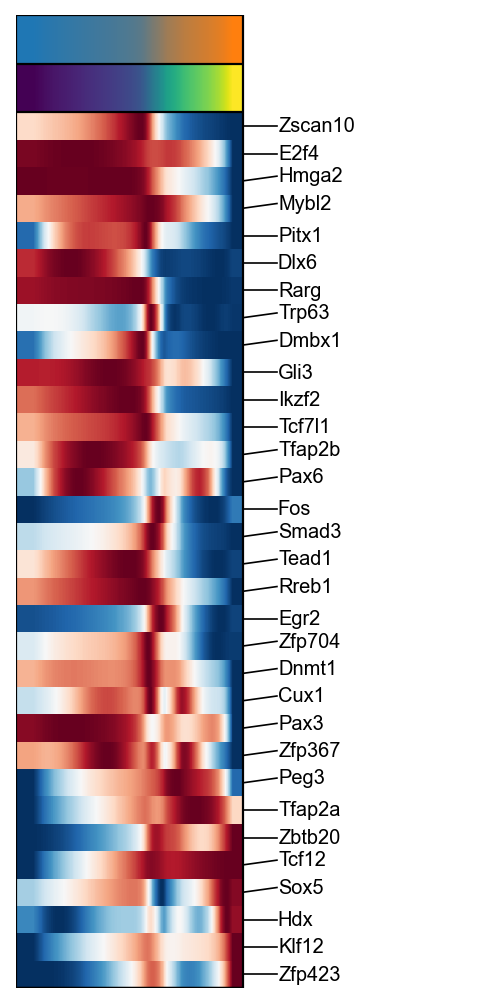

In [ ]:
# Filter genes to keep only those present in adata
valid_genes = [g for g in gene_list_clean1 if g in adata1.var_names]

# Set figure height dynamically (no empty space)
fig_height = len(valid_genes) * 0.25

g = scf.pl.trends(
    adata1,
    features=valid_genes,   # directly use your list
    basis="umap",
    annot="milestones",
    plot_emb=False,
    heatmap_space=0.0,
    figsize=(4, fig_height),
    ordering=None,
    return_genes=False,
    n_features=len(valid_genes)   # match exactly the list length
)
#plt.savefig("fig/1230_tf.svg")